<a href="https://colab.research.google.com/github/evansigho/Hamoye-Tag-Along-Codes/blob/main/Hamoye_Stage_B_Quiz_Oghenekaro_Igho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stage B quiz

In [6]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
#Reading Libraries
energydata = pd.read_csv('energydata_complete.csv')
energydata.head()

In [ ]:
#drop the 'date' and 'lights' columns

energydata = energydata.drop(['date', 'lights'], axis = 1) 
energydata.head()

In [ ]:
#data description
energydata.info()

In [ ]:
#normalize the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

energydata_scaled = pd.DataFrame(scaler.fit_transform(energydata),  columns = energydata.columns)

#get features and labels
X = energydata_scaled.drop(columns=['Appliances'])

y = energydata_scaled['Appliances']

In [ ]:
df.columns

In [ ]:
#1. Convert the data column to datetime format 2. Let's 
#create a feature week that contains the number of the week - weekofyear:

df['date'] = df['date'].apply(pd.to_datetime)
df['week'] = df['date'].apply(lambda t: t.weekofyear)

In [ ]:
df.groupby('week')[['date']].count()

In [ ]:
#Let's leave only weeks from 3 to 20:
df.drop(df[(df['week'] < 3) | (df['week'] > 20)].index, axis=0, inplace=True)

In [ ]:
#I create a column given by the index:
df = df.set_index('date')

In [ ]:
df.info()

In [ ]:
#Convert all columns (except week) to float64 format:
df['Appliances'] = df['Appliances'].astype('float')
df['lights'] =df['lights'].astype('float')

In [ ]:
df.head()

In [ ]:
#Let's visualize the last week:
plt.figure(figsize=(18, 8));
plt.plot(df[['Appliances']][df['week']==20]);
plt.xlabel('date');
plt.ylabel('Appliances');

#Validation

In [ ]:
#Dividing the sample into objects (features) - X and labels (target variable) - y:
X = df.drop('Appliances', axis=1)
y = df[['Appliances']]

I split the dataset into 2 parts:
1. Data for weeks 19-20 - test sample
2. Weeks 3-18 - training sample

In [ ]:
X_train = X[X['week'] < 19]
X_test = X[X['week'] >= 19]

y_train = y[:X_train.index[-1]]
y_test = y[X_test.index[0]:]

Let's look at the dimensions of the samples:

In [ ]:
X_train.shape, y_train.shape

((16128, 28), (16128, 1))

In [ ]:
X_test.shape, y_test.shape

((2016, 28), (2016, 1))

Gradient boosting - XGBoost

In [ ]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
dall = xgb.DMatrix(X, y)

In [ ]:
#Let's set the model parameters:
#Depth D=4, number of trees N=200
max_depth = 4
params = {'max_depth': max_depth}
num_rounds = 200

In [ ]:
#Let's train the model:
%%time

xgb_model = xgb.train(params, dtrain, num_rounds)

CPU times: user 8.07 s, sys: 14.2 ms, total: 8.08 s
Wall time: 4.25 s


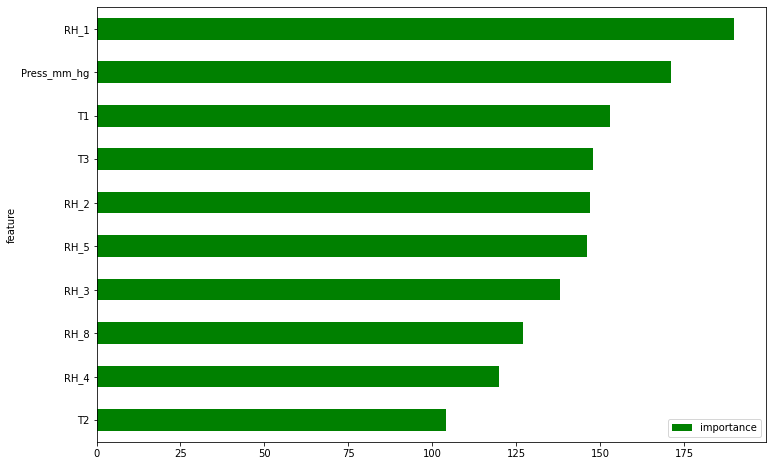

In [ ]:
#Visualize feature importances (top-10):
importances = xgb_model.get_fscore()
importances_df = pd.DataFrame({'importance': list(importances.values()), 'feature': list(importances.keys())})
importances_df.sort_values('importance').tail(10).plot(kind='barh', x='feature', figsize=(12, 8), color='green');

F score when evaluating the importance of features in Xgboost is calculated based on how often the split was done on a given feature A function that returns the total number of leaves for a depth-wise tree of depth D:

In [ ]:
def count_leaf(max_depth):
    
    L = 0
    
    for i in np.arange(max_depth+1):
        
        L += 2 ** i
        
    return L

In [ ]:
L = count_leaf(max_depth)

We get predictions in the form of a translation into a new feature space:
Each object, when driven through boosting, hits a specific leaf in each tree. If each tree has L leaves, then the total of the boosting tree has (N * L) leaves. Thus, an object can be represented as a vector of N indices, where the i-th position is the number of the leaf where the object fell in the i-th tree.

In [ ]:
predict_leaf_all = xgb_model.predict(dall, pred_leaf = True)

Convert leaves from [0; L) in [0, N*L):

In [ ]:
delta = np.array([]) 
step = 0
for i in range(predict_leaf_all.shape[1]):
    delta = np.append(delta, step)
    step += L

In [ ]:
convert_predict_all = predict_leaf_all + vector

In [ ]:
convert_predict_all_df = pd.DataFrame(convert_predict_all, columns=columns)